<a href="https://colab.research.google.com/github/redman157/phamson/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2809","key":"acaf3f1d99234da7afc8e4a336bb816d"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Nov 12 01:30 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                 title                                               size  lastUpdated          downloadCount  
--------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kaggle/kaggle-survey-2018                           2018 Kaggle ML & DS Survey Challenge                 4MB  2018-11-03 22:35:07           2118  
lava18/google-play-store-apps                       Google Play Store Apps                               2MB  2018-09-18 20:49:49          17671  
xvivancos/transactions-from-a-bakery                Transactions from a bakery                         113KB  2018-09-05 23:42:32           8789  
census/census-bureau-usa                            United States Census                               161MB  2018-04-17 18:52:46              0  
martinellis/nhl-game-data                           NHL Game Data                                      120MB  2018-09-

In [6]:
!kaggle competitions download -c digit-recognizer

 86% 63.0M/73.2M [00:00<00:00, 49.4MB/s]
100% 73.2M/73.2M [00:00<00:00, 106MB/s] 
 92% 45.0M/48.8M [00:00<00:00, 49.9MB/s]
100% 48.8M/48.8M [00:00<00:00, 127MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 29.2MB/s]


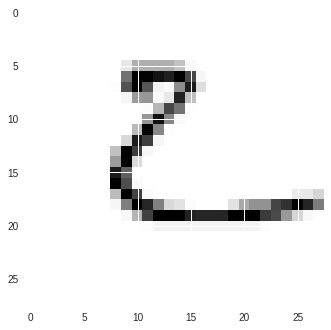

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import Sequential, optimizers
from keras.utils import to_categorical
from keras.models import load_model, model_from_json, save_model
from keras.preprocessing.image import ImageDataGenerator
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
y_train = train_data.label
X_train  = train_data.drop('label',axis = 1)

y_train = y_train.values
X_train = X_train.values

X_test = test_data.values

def load_data(path,data_path):
  if os.path.exists(path)  is False:
    data = data_path
    with open(path, 'wb') as f:
      pickle.dump(data_path,f)
    f.close()
  else:
    with open(path,'rb') as f:
      data = pickle.load(f)
    f.close()
  return data
train = load_data(os.path.join('train'),X_train)
test = load_data(os.path.join('test'),X_test)

X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
y_train = to_categorical(y_train, num_classes = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.2,
                                                  random_state=2)
plt.imshow(X_train[0][:,:,0])


In [42]:
# VGG net = Cv2d * 2 + maxpooling * 1 + Dropout + 1 flating -> dense + Dropout  -> output
model = Sequential()
model.add(Conv2D(64,kernel_size = (3,3),padding='same',
                  activation = 'relu',input_shape= (28,28,1)))
model.add(Conv2D(64,kernel_size = (3,3),padding='same',
                  activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32,kernel_size = (3,3),padding='same',
                  activation = 'relu'))
model.add(Conv2D(32,kernel_size = (3,3),padding='same',
                  activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
          
model.add(Dense(10,activation = 'softmax'))
          
model.compile(optimizer = optimizers.adam(lr = 0.001,decay=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train, y_train,
          epochs = 5,
          batch_size = 32,
          validation_split = 0.2)
model.save('digitmodel.h5')
json_string = model.to_json()
model = model_from_json(json_string)
model.load_weights('digitmodel.h5',by_name = True)

          

Train on 26880 samples, validate on 6720 samples
Epoch 1/5
26880/26880 [==============================] - 205s 8ms/step - loss: 0.2498 - acc: 0.9190 - val_loss: 0.0682 - val_acc: 0.9787
Epoch 2/5
26880/26880 [==============================] - 203s 8ms/step - loss: 0.0756 - acc: 0.9756 - val_loss: 0.0609 - val_acc: 0.9824
Epoch 3/5
26880/26880 [==============================] - 200s 7ms/step - loss: 0.0557 - acc: 0.9833 - val_loss: 0.0406 - val_acc: 0.9881
Epoch 4/5
26880/26880 [==============================] - 204s 8ms/step - loss: 0.0434 - acc: 0.9863 - val_loss: 0.0438 - val_acc: 0.9885
Epoch 5/5
26880/26880 [==============================] - 201s 7ms/step - loss: 0.0344 - acc: 0.9892 - val_loss: 0.0374 - val_acc: 0.9896


In [50]:
def loaded_model():
  model = load_model('digitmodel.h5')  
  return model
pred = loaded_model().predict(test)
pred.shape

(28000, 10)

In [49]:
pred_class = np.argmax(pred,axis = 1)
pred_class.shape
  

(28000,)